In [1]:
%matplotlib inline
import sys,time
import numpy as np
from collections import OrderedDict

import matplotlib.pyplot as plt


from IPython.core.display import display, HTML, clear_output
display(HTML("<style>.container { width:90% !important; }</style>"))

plt.rcParams['image.cmap'] = 'gray'
plt.rcParams['image.interpolation']='none'

sys.path.append('..')
import trainutils

class MonitorTest(trainutils.JupyterThreadMonitor):
    def run(self):
        step=0
        while self.isRunning:
            self.step=step
            step+=1
            
            images=[
                ('Random',np.random.rand(64,64)),
                ('Noise',np.random.rand(64,64)),
                ('junk',np.random.rand(64,64))
            ]
            
            self.updateGraphVals({'foo':np.random.rand(),'bar':np.random.rand()},('bar',))
            self.updateImageVals(OrderedDict(images))
            
            time.sleep(3.3)
            
            if step>10:
                break
            
            
mt=MonitorTest()
mt.start()

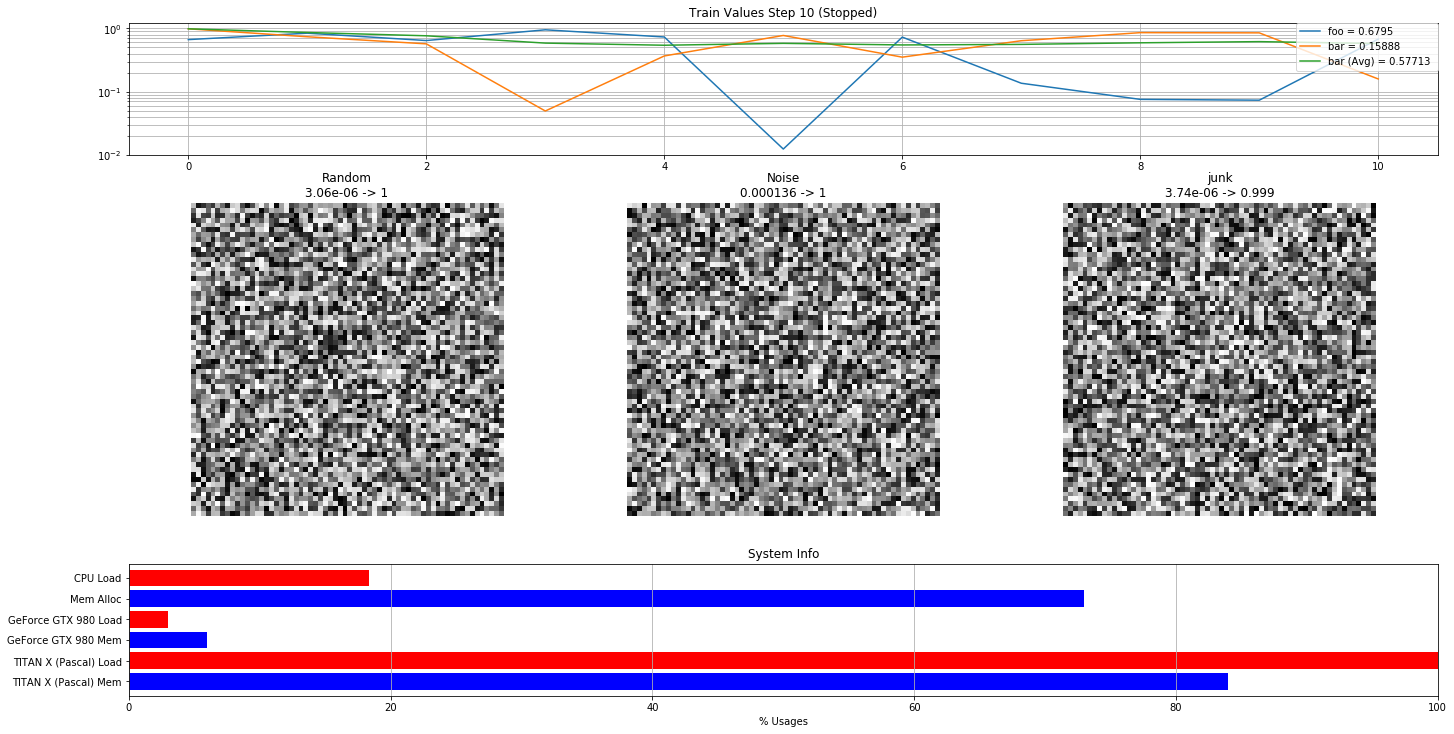

In [2]:
mt.displayMonitor()

In [3]:
mt.stop()